# 7 aula - Introdução a Regressão Linear Simples 

In [1]:
import pandas as pd
df = pd.DataFrame({'Temperatura': [14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2],
                'Total de Vendas':[215,325,185, 332, 406, 522, 412, 614, 544, 421, 445, 408]})
df.head(20)

,Temperatura,Total de Vendas
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


In [2]:
df.describe()

,Temperatura,Total de Vendas
count,12.000000,12.000000
mean,18.675000,402.416667
std,4.011149,126.042892
min,11.900000,185.000000
25%,16.100000,330.250000
50%,18.300000,410.000000
75%,22.225000,464.250000
max,25.100000,614.000000


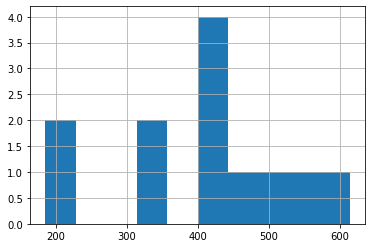

In [3]:
df['Total de Vendas'].hist();

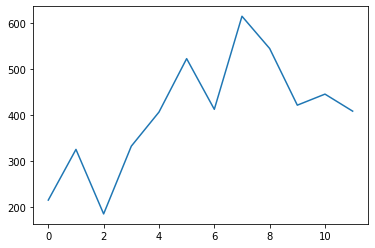

In [4]:
df['Total de Vendas'].plot()

## Plotando o Gráfico de Dispersão usando a biblioteca SEABORN

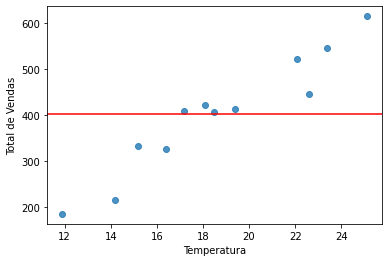

In [7]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Adicionando a média
média_vendas = df['Total de Vendas'].mean()

ax = sns.regplot(x=df['Temperatura'], y=df['Total de Vendas'], fit_reg=False)
plt.axhline(média_vendas, 0,25, color = 'r')
plt.show()

In [6]:
print("Rodar novamente adicionando a Média")

Rodar novamente adicionando a Média


# Qual é o "erro" nesta forma de predizer o valor total de vendas usando a Média?
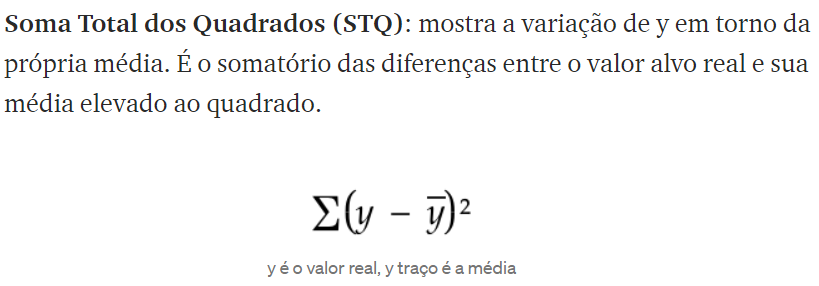


In [8]:
y = df['Total de Vendas'].values
y

array([215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

In [9]:
y_media = df['Total de Vendas'].mean()
y_media

402.4166666666667

In [10]:
STQ = sum((y-y_media)**2)
STQ

174754.91666666672

## Vou encontrar a reta de regressão usando o SEABORN

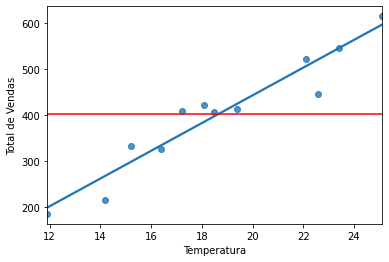

In [12]:
# use the function regplot to make a scatterplot
ax = sns.regplot(x=df['Temperatura'], y=df['Total de Vendas'], ci = None)
plt.axhline(média_vendas, 0,25, color = 'r')
plt.show()

In [ ]:
print("Rodar novamente adicionando a Média")

# Estimando um modelo de Regressão Linear Simples utilizando a biblioteca SKLEARN

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# criando variáveis que serão usadas daqui para frente
# variável preditora

X = np.array([14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2]).reshape((-1, 1))
# variável alvo
y = np.array([215,325,185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

model = LinearRegression()

In [14]:
X

array([[14.2],
       [16.4],
       [11.9],
       [15.2],
       [18.5],
       [22.1],
       [19.4],
       [25.1],
       [23.4],
       [18.1],
       [22.6],
       [17.2]])

## Encontra os parâmetros (coeficientes da reta) usando os dados de treinamento.

In [15]:
model = LinearRegression().fit(X, y)

## Apresenta os coeficientes: Linear (intercept) e Ângular (slope)
## y = a + bX

In [16]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: -159.4741523408622
slope: [30.08786179]


## Previsão de Vendas para dias Frios 10C

In [17]:
xi = np.array([10]).reshape(-1, 1)
yi_pred = model.predict(xi)
yi_pred

array([141.4044656])

Previsão de Vendas para dias Quentes 30C

In [18]:
xf = np.array([30]).reshape(-1, 1)
yf_pred = model.predict(xf)
yf_pred

array([743.16170149])

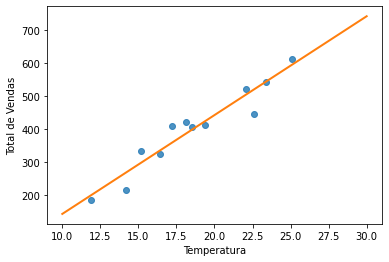

In [20]:
ax = sns.regplot(x=df['Temperatura'], y=df['Total de Vendas'], fit_reg=False)
plt.plot([10, 30], [141.4044656 , 743.16170149], linewidth=2)
plt.show()

In [21]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[267.77348514 333.96678108 198.57140301 297.86134693 397.15129085
 505.46759331 424.23036647 595.73117869 544.58181364 385.11614613
 520.51152421 358.03707052]


## O quanto a TEMPERATURA explica a variabilidade das VENDAS

In [28]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.916818933091919


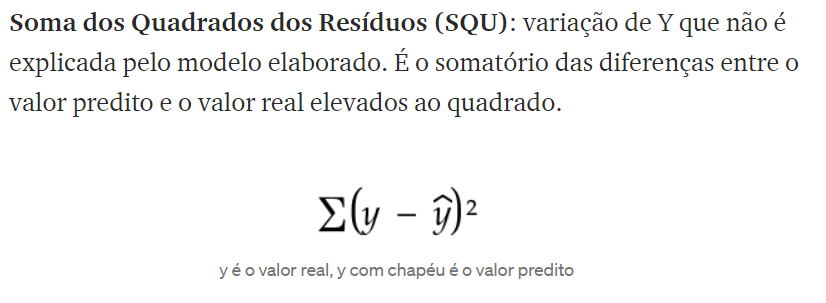

In [22]:
y

array([215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

In [23]:
y_pred

array([267.77348514, 333.96678108, 198.57140301, 297.86134693,
       397.15129085, 505.46759331, 424.23036647, 595.73117869,
       544.58181364, 385.11614613, 520.51152421, 358.03707052])

In [24]:
# Erro para a Média
SQT = sum((y-y_media)**2)
SQT

174754.91666666672

In [30]:
# Erro para o modelo preditivo
SQU = sum((y-y_pred)**2)
SQU

14536.300415766136

# Quanto a variável explicativa diminuiu a Variabiliade da variavel independente?

In [26]:
SQR = SQT - SQU
print(SQR)

160218.61625090058


## Em termos percentuais?

In [29]:
R2 = SQR/SQT
print(R2)

#0.916818933091919

0.916818933091919


In [41]:
print("Final da aula!")

Final da aula!


In [37]:
res = y - y_pred

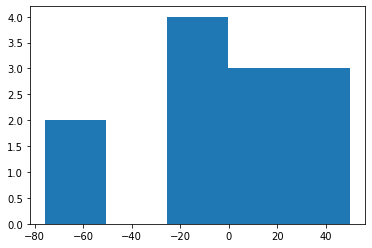

In [40]:
plt.hist(res, bins='auto')
plt.show()

In [35]:
res.hist()

AttributeError: ignored